## 데이터 전처리

- http://bit.ly/bream_smelt

### 데이터 가공 시 Numpy 사용

In [1]:

# 데이터 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [ ]:
# 파이썬 기본
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

In [4]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
# numpy로 가공
fish_data = np.column_stack((fish_length, fish_weight))

In [11]:
fish_data.shape

(49, 2)

In [8]:
# numpy로 fish_target
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [10]:
fish_target.shape

(49,)

- 현재 데이터양이 작아서 큰 차이 없음
- 데이터양 많아지면 파이썬 리스트보다 Numpy 배열이 훨씬 빠름
- Numpy로 데이터 가공할 것

### 사이킷런 사용. 훈련 세트, 테스트 세트 분리
- 이전 방식 : Numpy로 랜덤으로 섞은 뒤 파이썬으로 나눔

- 사이킷런 사용 : model_selection.train_test_split() 함수 사용

In [12]:
from sklearn.model_selection import train_test_split

- random_state : 무작위성을 고정, 재현 가능한 결과를 얻기 위한 값
- 정수 아무거나 입력 가능 : 42(전통 시드값), 20240409(날짜 입력 가능)

In [ ]:
# 훈련세트, 테스트세트 분리
# random_state = : Numpy random 중 random_seed와 동일
# test_size = 0.3 => 7:3으로 나눔
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42, test_size=0.3
)

In [24]:
train_input.shape

(34, 2)

In [25]:
train_target.shape

(34,)

In [26]:
test_input.shape

(15, 2)

In [27]:
test_target.shape

(15,)

In [ ]:
# 도미 34 : 빙어 15 => 2.5 : 1 되어야 함
# 빙어갯수가 약간 모자람
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
# stratify = 입력되는 값을 참조해서 비율을 적당히 조절하는 값
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42, test_size=0.3, stratify=fish_target
)

In [30]:
test_target

array([0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

### 수상한 도미 
- 예측이 빗나간 경우

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)   # 훈련
kn.score(test_input, test_target)   # 테스트

1.0

In [ ]:
# 25cm, 150g 물고기 예측
# 여러 데이터를 예측할 것으로 이차원 리스트 형태로 입력 [[]]
kn.predict([[25, 150]])

# 빙어(0)로 예측하고 있음음

array([0.])

#### 예측 실패 파악

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

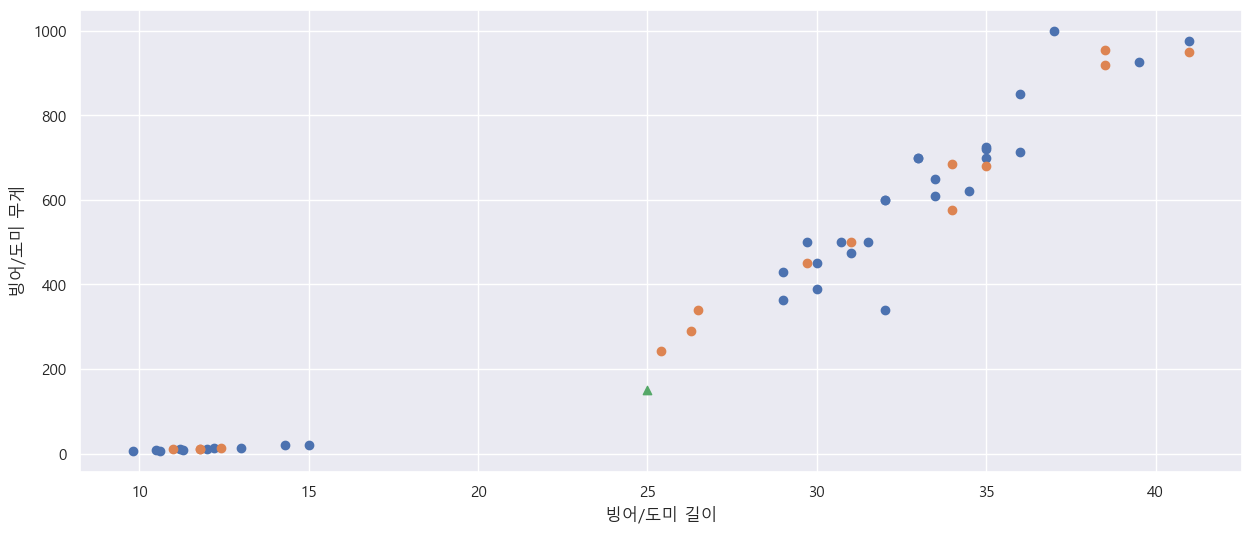

In [43]:
plt.figure(figsize=(15, 6))
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('빙어/도미 길이')
plt.ylabel('빙어/도미 무게')

plt.show()

In [44]:
# 20, 150의 최근접 이웃 찾기
distances, indexes = kn.kneighbors([[25, 150]])

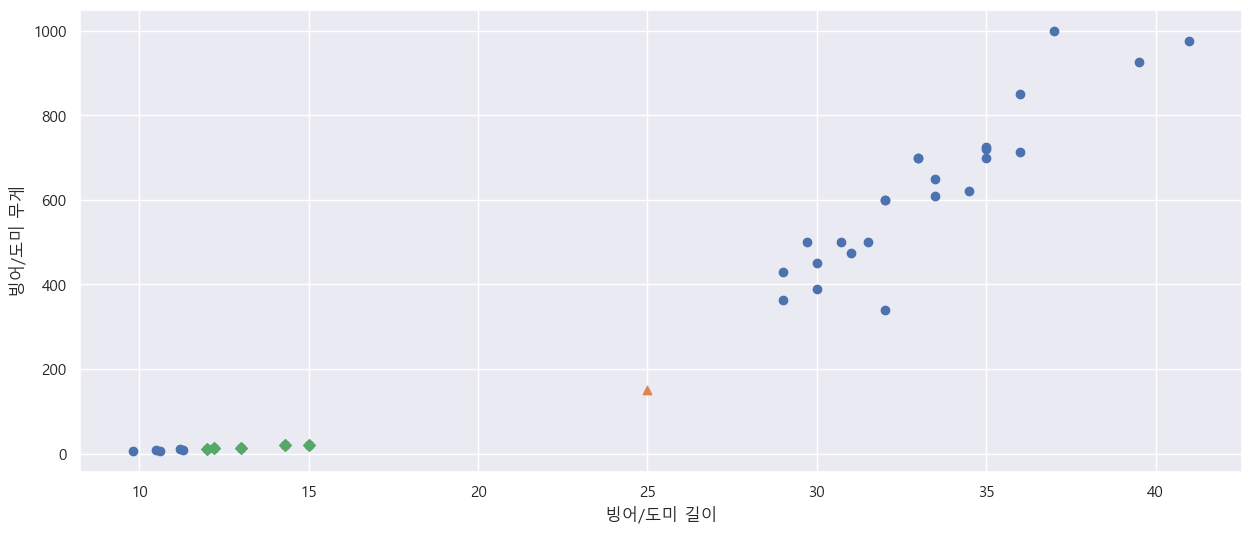

In [46]:
plt.figure(figsize=(15, 6))
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('빙어/도미 길이')
plt.ylabel('빙어/도미 무게')

plt.show()

In [47]:
train_input[indexes]

array([[[15. , 19.9],
        [14.3, 19.7],
        [13. , 12.2],
        [12.2, 12.2],
        [12. ,  9.8]]])

In [48]:
train_target[indexes]

array([[0., 0., 0., 0., 0.]])

In [49]:
distances

array([[130.48375378, 130.73859415, 138.32150953, 138.39320793,
        140.80142045]])

- x축과 y축 term단위가 차이남
- x축은 10단위, y축은 100단위
- 데이터의 거리값이 정확하게 계산되지 않음

### 다시 데이터 전처리
- 표준 점수(standard score), z-score
- x축, y축 전부 -2 ~ 2 사이의 데이터로 스케일 변경

In [50]:
# axis=0 : 행 기준 / axis=1 : 열 기준
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [51]:
mean

array([ 27.02352941, 445.60294118])

In [52]:
std

array([ 10.0816099 , 319.21122132])

- 표준점수화 - 'Scaling'
    - 평균 27.0cm, 445.6g
    - 도미 실제데이터 32.0cm, 600g
    - 빙어 실제데이터 15.0cm, 19.9g
    - => 도미 5, 154 / 빙어 -12, -425
    - 표준편차로 나눔

In [54]:
train_scaled = (train_input - mean) / std

In [55]:
train_scaled

array([[-1.4703534 , -1.35773091],
       [ 0.49361864,  0.48368306],
       [ 0.74159491,  0.54633749],
       [ 0.36467098,  0.17041086],
       [ 0.49361864,  0.48368306],
       [ 0.79119016,  0.85960969],
       [-1.55962486, -1.36869543],
       [ 0.89038067,  0.84081336],
       [ 0.19604712, -0.04887968],
       [-1.56954391, -1.36524944],
       [ 0.26548048,  0.17041086],
       [-1.4901915 , -1.36524944],
       [ 0.39442813,  0.09209281],
       [ 0.98957118,  1.73677184],
       [ 0.19604712, -0.25877205],
       [ 0.59280915,  0.79695525],
       [-1.26205334, -1.33423549],
       [ 0.44402339,  0.17041086],
       [ 1.23754745,  1.50181769],
       [-1.70841062, -1.37496088],
       [ 0.89038067,  1.26686354],
       [-1.63897726, -1.3724547 ],
       [ 0.6424044 ,  0.51501027],
       [-1.62905821, -1.37402106],
       [ 0.79119016,  0.79695525],
       [ 0.79119016,  0.8752733 ],
       [-1.391001  , -1.35773091],
       [ 0.29523763,  0.01377476],
       [ 0.59280915,

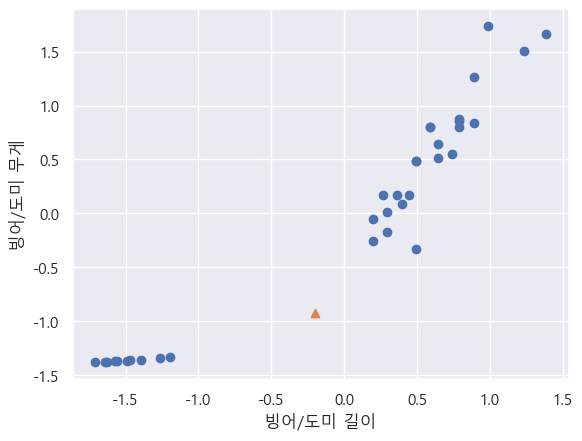

In [58]:
# 전처리(스케일링) 데이터 차트 표시
scaled_data = ([25, 150] - mean) / std
plt.figure()
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
# plt.scatter(25, 150, marker='^')
plt.scatter(scaled_data[0], scaled_data[1], marker='^')
plt.xlabel('빙어/도미 길이')
plt.ylabel('빙어/도미 무게')

plt.show()

In [59]:
kn

KNeighborsClassifier()

In [60]:
# 재훈련
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [62]:
# 테스트 세트도 스케일링 해야 함
test_scaled = (test_input - mean) / std

In [70]:
kn.score(test_scaled, test_target)

1.0

In [69]:
scaled_data

array([-0.20071491, -0.92604182])

In [68]:
# 예측
kn.predict([scaled_data])

array([1.])

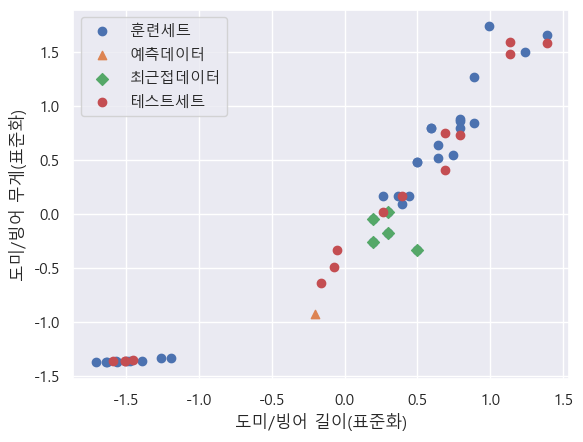

In [ ]:
distances, indexes = kn.kneighbors([scaled_data])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='훈련세트')
plt.scatter(scaled_data[0], scaled_data[1], marker='^', label='예측데이터')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D', label='최근접데이터')
plt.scatter(test_scaled[:, 0], test_scaled[:, 1], label='테스트세트')
plt.xlabel('도미/빙어 길이(표준화)')
plt.ylabel('도미/빙어 무게(표준화)')
plt.legend()    # 범례 표시

plt.show()

- 두 특성(길이, 무게) 스케일이 차이나기 때문에 발생
- 표준점수화 해야 함

#### 추가

- (데이터 - 평균) / 표준편차 -> 스케일링 => 불편함
- 사이킷런에서 제공하고 있음 -> preprocessing.StandardScaler

In [75]:
# 표준스케일러 모듈 사용
from sklearn.preprocessing import StandardScaler

In [76]:
# (test_input - mean) / std 대체
scaler = StandardScaler()

In [77]:
train_input2 = scaler.fit_transform(train_input)
test_input2 = scaler.transform(test_input)

In [80]:
test_input2

array([[-1.58938201, -1.36556271],
       [-1.51002961, -1.36493617],
       [ 1.13835694,  1.59579935],
       [ 0.79119016,  0.73430081],
       [ 0.69199966,  0.40536501],
       [-1.4505153 , -1.35397164],
       [-0.07176725, -0.48746075],
       [ 1.38633321,  1.58013574],
       [-0.16103871, -0.6378314 ],
       [ 0.69199966,  0.74996442],
       [ 0.39442813,  0.17041086],
       [ 1.13835694,  1.48615408],
       [ 0.26548048,  0.01377476],
       [-1.51002961, -1.3646229 ],
       [-0.05192915, -0.33082465]])

In [81]:
kn2 = KNeighborsClassifier()

In [82]:
kn2.fit(train_input2, train_target)

KNeighborsClassifier()

In [83]:
kn2.score(test_input2, test_target)

1.0

In [84]:
kn2.predict([scaled_data])

array([1.])